In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import KNNImputer
import statsmodels.formula.api as smf
import statsmodels.api as sm

DATA_FOLDER = 'Data/'
HOUSEHOLD_DATASET = DATA_FOLDER+'PisoFirme_AEJPol-20070024_household.dta'
INDIVIDUAL_DATASET = DATA_FOLDER+'PisoFirme_AEJPol-20070024_individual.dta'

household = pd.read_stata(HOUSEHOLD_DATASET)
individual = pd.read_stata(INDIVIDUAL_DATASET)

In [2]:
household.head(7)

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,C_blocksdirtfloor,C_HHdirtfloor,C_child05,C_households,...,S_cesds,S_pss,S_instcement,S_instsanita,S_restsanita,S_constceili,S_restowalls,S_improveany,S_logrent,S_logsell
0,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.903487
1,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,17.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.615806
2,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,6.214608,10.819778
3,0.0,70000537.0,-103.50367,25.583067,7.0,47,0.3,0.036629,0.555554,819.0,...,20.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,11.385092,11.918390
4,0.0,70000537.0,-103.50367,25.583067,7.0,47,0.3,0.036629,0.555554,819.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.703783,10.819778
5,0.0,70000537.0,-103.50367,25.583067,7.0,41,0.3,0.036629,0.555554,819.0,...,25.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,4.605170,8.517193
6,0.0,70000537.0,-103.50367,25.583067,7.0,40,0.3,0.036629,0.555554,819.0,...,18.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,5.857933,9.615806


In [3]:
individual.head(20)

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,S_age,S_gender,S_childma,S_childmaage,...,S_milkprogram,S_foodprogram,S_seguropopular,S_hasanimals,S_animalsinside,S_garbage,S_washhands,S_incomepc,S_cashtransfers,S_assetspc
0,0.0,70000537.0,-103.503670,25.583067,7.0,47,1.0,0,1.0,27.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.000000,0.0,21158.214844
1,0.0,70000537.0,-103.503670,25.583067,7.0,40,37.0,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1000.000000,0.0,53054.988281
2,0.0,70000537.0,-103.503670,25.583067,7.0,40,1.0,0,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1100.000000,0.0,52930.226562
3,0.0,70000537.0,-103.503670,25.583067,7.0,47,43.0,hombre,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,660.416687,0.0,30632.578125
4,0.0,70000537.0,-103.503670,25.583067,7.0,47,4.0,hombre,1.0,27.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.000000,0.0,21158.214844
5,0.0,70000537.0,-103.503670,25.583067,7.0,40,4.0,hombre,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,560.000000,60.0,21200.611328
6,0.0,70000537.0,-103.503670,25.583067,7.0,40,18.0,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1100.000000,0.0,52930.226562
7,0.0,70000537.0,-103.503670,25.583067,7.0,40,3.0,0,0.0,NaN,...,0.0,0.0,0.0,1.0,0.0,1.0,3.0,1108.333374,0.0,35087.679688
8,0.0,70000537.0,-103.503670,25.583067,7.0,47,5.0,hombre,1.0,30.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,660.416687,0.0,30632.578125
9,0.0,70000537.0,-103.503670,25.583067,7.0,40,30.0,0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,560.000000,60.0,21200.611328


In [4]:
temp = individual['S_childmaage'].copy()
msk = individual['S_childma'].apply(lambda x : True if x == 0 else False)
temp[msk] = 0
individual['S_childmaage'] = temp

In [5]:
temp = individual['S_childmaeduc'].copy()
msk = individual['S_childma'].apply(lambda x : True if x == 0 else False)
temp[msk] = 0
individual['S_childmaeduc'] = temp

In [6]:
temp = individual['S_childpaage'].copy()
msk = individual['S_childpa'].apply(lambda x : True if x == 0 else False)
temp[msk] = 0
individual['S_childpaage'] = temp

In [7]:
temp = individual['S_childpaeduc'].copy()
msk = individual['S_childpa'].apply(lambda x : True if x == 0 else False)
temp[msk] = 0
individual['S_childpaeduc'] = temp

# Data processing

### A few stats

In [8]:
print("We have ",len(household.index)," households.")
print("We have ", len(household.columns)," variables for households.")
print("How many missing values is there ? ", household.isna().any().sum())

We have  2783  households.
We have  78  variables for households.
How many missing values is there ?  51


In [9]:
print("We have ",len(individual.index)," individuals.")
print("We have ", len(individual.columns)," variables for individuals.")
print("How many missing values is there ? ", individual.isna().any().sum())

We have  6693  individuals.
We have  89  variables for individuals.
How many missing values is there ?  24


### Missing values

In [10]:
individual['S_gender'] = individual['S_gender'].apply(lambda x : 1 if type(x) == str else 0)

In [11]:
#Missing values will be imputed with a K-Nearest Neigbors algorithm
imputer = KNNImputer()

#Households
mod = imputer.fit(household)
H = pd.DataFrame(mod.transform(household))
H.columns = household.columns

#Individuals
temp = imputer.fit(individual)
I = pd.DataFrame(temp.transform(individual))
I.columns = individual.columns

In [12]:
H.head()

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,C_blocksdirtfloor,C_HHdirtfloor,C_child05,C_households,...,S_cesds,S_pss,S_instcement,S_instsanita,S_restsanita,S_constceili,S_restowalls,S_improveany,S_logrent,S_logsell
0,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819.0,...,14.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.903487
1,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819.0,...,17.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,5.298317,9.615806
2,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819.0,...,16.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,6.214608,10.819778
3,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,0.3,0.036629,0.555554,819.0,...,20.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,11.385092,11.918390
4,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,0.3,0.036629,0.555554,819.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.703783,10.819778


In [13]:
I.head()

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,S_age,S_gender,S_childma,S_childmaage,...,S_milkprogram,S_foodprogram,S_seguropopular,S_hasanimals,S_animalsinside,S_garbage,S_washhands,S_incomepc,S_cashtransfers,S_assetspc
0,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,1.0,0.0,1.0,27.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.000000,0.0,21158.214844
1,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,37.0,0.0,0.8,19.2,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1000.000000,0.0,53054.988281
2,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,1.0,0.0,1.0,18.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1100.000000,0.0,52930.226562
3,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,43.0,1.0,1.0,26.6,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,660.416687,0.0,30632.578125
4,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,4.0,1.0,1.0,27.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.000000,0.0,21158.214844


In [14]:
print("How many missing values is there ? ", H.isna().any().sum())
print("How many missing values is there ? ", I.isna().any().sum())

How many missing values is there ?  0
How many missing values is there ?  0


In [15]:
#No more missing values in the dataframes but we need to adjust some values because the KNN returns decimal numbers
#and features are categorical they only can be 0 or 1. We will take 1 if the value is above 0.5 and 0 otherwise. 
house_f = H.drop(['dpisofirme', 'idcluster', 'coord_x', 'coord_y', 'idmun', 'idmza', 'C_blocksdirtfloor', 
                  'C_HHdirtfloor', 'C_child05', 'C_rooms', 'C_HHpersons', 'C_waterland', 'C_waterhouse',
                  'C_waterbath', 'C_gasheater', 'C_refrigerator', 'C_washing', 'C_telephone', 'C_vehicle',
                  'C_overcrowding', 'C_poverty', 'C_illiterate', 'C_headeduc', 'C_dropouts515', 'C_employment',
                  'C_earnincome', 'S_cementfloor2000', 'S_incomepc', 'S_assetspc', 'S_shpeoplework', 'S_hrsworkedpc',
                  'S_consumptionpc', 'S_cashtransfers', 'S_dem1', 'S_dem2', 'S_dem3', 'S_dem4', 'S_dem5', 'S_dem6',
                  'S_dem7', 'S_dem8', 'S_shcementfloor', 'S_cementfloorkit', 'S_cementfloordin', 'S_cementfloorbat',
                  'S_cementfloorbed', 'S_logrent', 'S_logsell'], axis = 1).columns
indiv_f = I.drop(['dpisofirme', 'idcluster', 'coord_x', 'coord_y', 'idmun', 'idmza', 'S_haz', 'S_whz', 'S_malincom',
                 'S_palincom', 'S_incomepc', 'S_cashtransfers', 'S_assetspc'], axis = 1).columns

for f in house_f:
    H[f] = H[f].apply(lambda x : int(x) if abs(int(x)-x)<0.5 else int(x+1))
    
for f in indiv_f:
    I[f] = I[f].apply(lambda x : int(x) if abs(int(x)-x)<0.5 else int(x+1))

In [16]:
H.head()

,dpisofirme,idcluster,coord_x,coord_y,idmun,idmza,C_blocksdirtfloor,C_HHdirtfloor,C_child05,C_households,...,S_cesds,S_pss,S_instcement,S_instsanita,S_restsanita,S_constceili,S_restowalls,S_improveany,S_logrent,S_logsell
0,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819,...,14,12,0,0,0,0,0,0,5.298317,9.903487
1,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819,...,17,24,0,0,0,0,0,0,5.298317,9.615806
2,0.0,70000537.0,-103.50367,25.583067,7.0,40.0,0.3,0.036629,0.555554,819,...,16,16,0,0,0,0,0,0,6.214608,10.819778
3,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,0.3,0.036629,0.555554,819,...,20,19,0,0,0,0,0,0,11.385092,11.918390
4,0.0,70000537.0,-103.50367,25.583067,7.0,47.0,0.3,0.036629,0.555554,819,...,4,5,0,0,0,0,0,0,5.703783,10.819778


### Construction of the target

In [17]:
#We will generate a binary outcome vector indicating the global health status of the different persons. We will make 
#a combination of the different features about health.
#1 = health problems, 0 = good health
health = ['S_parcount', 'S_diarrhea', 'S_anemia', 'S_respira', 'S_skin', 'S_otherdis']

def target():
    N = len(I.index)
    target = []
    for n in range(N):
        if individual[health].loc[n].sum() >= 1:
            target.append(1)
        else:
            target.append(0)
    return target

target = pd.DataFrame(target())

### Normalization

In [18]:
to_norm = ['idcluster', 'coord_x', 'coord_y', 'idmun','idmza', 'S_age', 'S_childmaage', 'S_childmaeduc', 'S_childpaage',
          'S_childpaeduc', 'S_HHpeople', 'S_rooms', 'S_mccdts', 'S_pbdypct', 'S_haz', 'S_whz', 'S_malincom', 'S_palincom',
          'S_washhands', 'S_incomepc', 'S_cashtransfers', 'S_assetspc']
I[to_norm] = normalize(I[to_norm])

### Feature selection

In [19]:
selection = I.drop(['S_parcount', 'S_diarrhea', 'S_anemia', 'S_respira', 'S_skin', 'S_otherdis'], axis = 1)

In [20]:
selection = selection.drop(['idcluster', 'coord_x', 'coord_y', 'idmza', 'idmun'], axis = 1)

In [21]:
col = selection.columns
to_del = [j for j in col if not j.startswith('dtriage')]
selection = selection[to_del]

In [22]:
selection.head()

,dpisofirme,S_age,S_gender,S_childma,S_childmaage,S_childmaeduc,S_childpa,S_childpaage,S_childpaeduc,S_HHpeople,...,S_milkprogram,S_foodprogram,S_seguropopular,S_hasanimals,S_animalsinside,S_garbage,S_washhands,S_incomepc,S_cashtransfers,S_assetspc
0,0.0,1.428560e-08,0,1,3.857113e-07,1.714272e-07,0,0.000000e+00,0.000000e+00,7.142802e-08,...,0,0,0,1,0,1,2.857121e-08,0.000000,0.0,0.000302
1,0.0,5.285672e-07,0,1,2.714264e-07,9.999920e-08,0,0.000000e+00,0.000000e+00,2.857120e-08,...,0,0,0,0,0,1,4.285680e-08,0.000014,0.0,0.000758
2,0.0,1.428560e-08,0,1,2.571408e-07,1.714272e-07,0,0.000000e+00,0.000000e+00,2.857120e-08,...,0,0,0,0,0,1,7.142800e-08,0.000016,0.0,0.000756
3,0.0,6.142809e-07,1,1,3.857113e-07,1.142848e-07,1,2.714265e-07,7.142802e-08,5.714241e-08,...,0,0,0,0,0,1,5.714241e-08,0.000009,0.0,0.000438
4,0.0,5.714242e-08,1,1,3.857113e-07,1.714272e-07,0,0.000000e+00,0.000000e+00,7.142802e-08,...,0,0,0,1,0,1,2.857121e-08,0.000000,0.0,0.000302


#### Pearson's correlation

In [23]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y, rowvar = False)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(selection, target, 15)
print(str(len(cor_feature)), 'selected features')
print("Selected features :", cor_feature)

15 selected features
Selected features : ['S_pbdypct', 'S_foodprogram', 'S_animalsinside', 'dpisofirme', 'S_hasanimals', 'S_childmaeduc', 'S_HHpeople', 'S_childpaeduc', 'S_haz', 'S_childmaage', 'S_childma', 'S_childpaage', 'S_childpa', 'S_gender', 'S_age']


Using a logistic regression, the accuracy is  0.6085657370517928
F1-score : 0.5218978102189782
Recall score : 0.5029308323563892
Precision_score : 0.5423514538558787


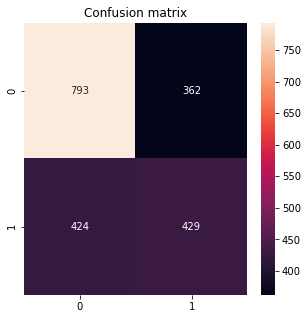

In [24]:
#Split data set between train and test
x_tr, x_te, y_tr, y_te = train_test_split(selection, np.ravel(target), test_size = 0.3, random_state = 50)

#Logistic regression
model = selection[cor_feature].columns
logistic = LogisticRegression(solver = 'lbfgs', max_iter = 5000)
log_reg = logistic.fit(x_tr[model], y_tr)
pred = log_reg.predict(x_te[model])

#Statistics
print('Using a logistic regression, the accuracy is ', accuracy_score(y_te, pred))
print('F1-score :', f1_score(y_te, pred))
print('Recall score :', recall_score(y_te, pred))
print('Precision_score :', precision_score(y_te, pred))

#Confusion matrix
matrix = confusion_matrix(y_te, pred)
plt.figure(figsize = (5, 5))
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.show()

#### Chi-2

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_norm = MinMaxScaler().fit_transform(selection)
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(X_norm, target)
chi_support = chi_selector.get_support()
chi_feature = selection.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print("Selected features :", chi_feature)

15 selected features
Selected features : ['dpisofirme', 'S_age', 'S_gender', 'S_childma', 'S_childmaage', 'S_childmaeduc', 'S_childpa', 'S_childpaage', 'S_childpaeduc', 'S_HHpeople', 'S_haz', 'S_foodprogram', 'S_seguropopular', 'S_hasanimals', 'S_animalsinside']


Using a logistic regression, the accuracy is  0.6090637450199203
F1-score : 0.5210494203782795
Recall score : 0.5005861664712778
Precision_score : 0.5432569974554707


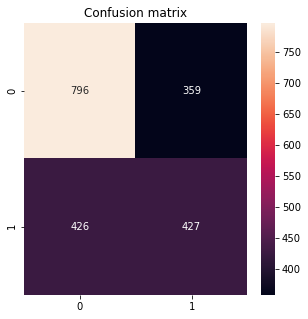

In [26]:
#Split data set between train and test
x_tr, x_te, y_tr, y_te = train_test_split(selection, np.ravel(target), test_size = 0.3, random_state = 50)

#Logistic regression
model = selection[chi_feature].columns
logistic = LogisticRegression(solver = 'lbfgs', max_iter = 5000)
log_reg = logistic.fit(x_tr[model], y_tr)
pred = log_reg.predict(x_te[model])

#Statistics
print('Using a logistic regression, the accuracy is ', accuracy_score(y_te, pred))
print('F1-score :', f1_score(y_te, pred))
print('Recall score :', recall_score(y_te, pred))
print('Precision_score :', precision_score(y_te, pred))

#Confusion matrix
matrix = confusion_matrix(y_te, pred)
plt.figure(figsize = (5, 5))
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.show()

#### LightGBM

In [27]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=15)
embeded_lgb_selector.fit(selection, target)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = selection.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')
print(embeded_lgb_feature)

/Users/eliaescoffier/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Users/eliaescoffier/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


15 selected features
['S_age', 'S_childmaage', 'S_childmaeduc', 'S_childpaage', 'S_childpaeduc', 'S_HHpeople', 'S_rooms', 'S_mccdts', 'S_pbdypct', 'S_haz', 'S_whz', 'S_palincom', 'S_washhands', 'S_incomepc', 'S_assetspc']


Using a logistic regression, the accuracy is  0.575199203187251
F1-score : 0.0
Recall score : 0.0
Precision_score : 0.0


/Users/eliaescoffier/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


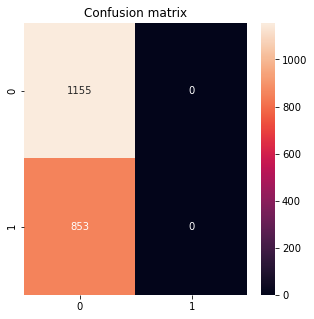

In [28]:
#Split data set between train and test
x_tr, x_te, y_tr, y_te = train_test_split(selection, np.ravel(target), test_size = 0.3, random_state = 50)

#Logistic regression
model = selection[embeded_lgb_feature].columns
logistic = LogisticRegression(solver = 'lbfgs', max_iter = 5000)
log_reg = logistic.fit(x_tr[model], y_tr)
pred = log_reg.predict(x_te[model])

#Statistics
print('Using a logistic regression, the accuracy is ', accuracy_score(y_te, pred))
print('F1-score :', f1_score(y_te, pred))
print('Recall score :', recall_score(y_te, pred))
print('Precision_score :', precision_score(y_te, pred))

#Confusion matrix
matrix = confusion_matrix(y_te, pred)
plt.figure(figsize = (5, 5))
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.show()

#### RFE

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(max_iter = 5000), n_features_to_select=15, step=10, verbose=5)
rfe_selector.fit(X_norm, np.ravel(target))
rfe_support = rfe_selector.get_support()
rfe_feature = selection.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 30 features.
Fitting estimator with 20 features.
15 selected features
['dpisofirme', 'S_age', 'S_childmaage', 'S_childmaeduc', 'S_childpa', 'S_childpaage', 'S_HHpeople', 'S_rooms', 'S_mccdts', 'S_haz', 'S_palincom', 'S_seguropopular', 'S_washhands', 'S_incomepc', 'S_cashtransfers']


Using a logistic regression, the accuracy is  0.6055776892430279
F1-score : 0.3366834170854272
Recall score : 0.23563892145369286
Precision_score : 0.5894428152492669


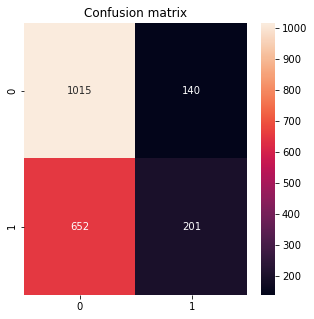

In [30]:
#Split data set between train and test
x_tr, x_te, y_tr, y_te = train_test_split(selection, np.ravel(target), test_size = 0.3, random_state = 50)

#Logistic regression
model = selection[rfe_feature].columns
logistic = LogisticRegression(solver = 'lbfgs', max_iter = 5000)
log_reg = logistic.fit(x_tr[model], y_tr)
pred = log_reg.predict(x_te[model])

#Statistics
print('Using a logistic regression, the accuracy is ', accuracy_score(y_te, pred))
print('F1-score :', f1_score(y_te, pred))
print('Recall score :', recall_score(y_te, pred))
print('Precision_score :', precision_score(y_te, pred))

#Confusion matrix
matrix = confusion_matrix(y_te, pred)
plt.figure(figsize = (5, 5))
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.show()

#### Random Forest

In [31]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=15)
embeded_rf_selector.fit(selection, np.ravel(target))

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = selection.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

7 selected features
['S_age', 'S_gender', 'S_childpa', 'S_pbdypct', 'S_incomepc', 'S_cashtransfers', 'S_assetspc']


Using a logistic regression, the accuracy is  0.6030876494023905
F1-score : 0.5040448039825762
Recall score : 0.47479484173505276
Precision_score : 0.5371352785145889


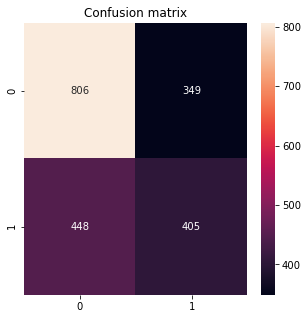

In [32]:
#Split data set between train and test
x_tr, x_te, y_tr, y_te = train_test_split(selection, np.ravel(target), test_size = 0.3, random_state = 50)

#Logistic regression
model = selection[embeded_rf_feature].columns
logistic = LogisticRegression(solver = 'lbfgs', max_iter = 5000)
log_reg = logistic.fit(x_tr[model], y_tr)
pred = log_reg.predict(x_te[model])

#Statistics
print('Using a logistic regression, the accuracy is ', accuracy_score(y_te, pred))
print('F1-score :', f1_score(y_te, pred))
print('Recall score :', recall_score(y_te, pred))
print('Precision_score :', precision_score(y_te, pred))

#Confusion matrix
matrix = confusion_matrix(y_te, pred)
plt.figure(figsize = (5, 5))
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.show()

#### Lasso regularization

Best alpha using built-in LassoCV: 0.001303
Best score using built-in LassoCV: 0.044097
Lasso picked 5 variables and eliminated the other 25 variables


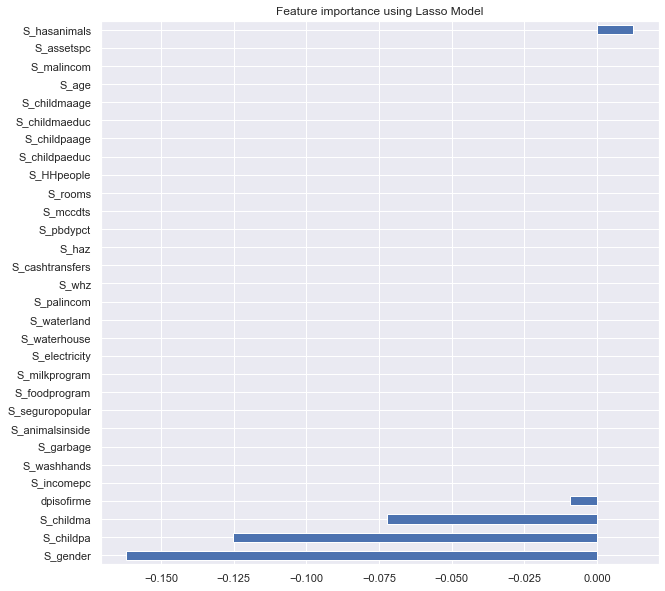

Selected features : ['S_gender', 'S_childpa', 'S_childma', 'dpisofirme', 'S_hasanimals']


In [33]:
#Lasso regularization
from sklearn.linear_model import LassoCV, Lasso

reg = LassoCV(max_iter = 10000)
reg_ = reg.fit(selection, np.ravel(target))
print("Best alpha using built-in LassoCV: %f" % reg_.alpha_)
print("Best score using built-in LassoCV: %f" %reg_.score(selection, np.ravel(target)))
coef = pd.Series(reg_.coef_, index = selection.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
sns.set()
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 10)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

kept = imp_coef[[imp_coef[i] != 0 for i in range(len(imp_coef))]]
lasso_feature = selection[kept.index].columns.tolist()

print("Selected features :", lasso_feature)

In [37]:
kept = imp_coef[[imp_coef[i] != 0 for i in range(len(imp_coef))]]
lasso_support = []
for i in selection.columns:
    lasso_support.append(i in kept)

Using a logistic regression, the accuracy is  0.6070717131474104
F1-score : 0.5150583896742471
Recall score : 0.4912075029308324
Precision_score : 0.541343669250646


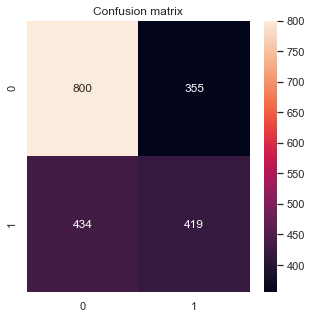

In [38]:
#Split data set between train and test
x_tr, x_te, y_tr, y_te = train_test_split(selection, np.ravel(target), test_size = 0.3, random_state = 50)

#Logistic regression
model = selection[lasso_feature].columns
logistic = LogisticRegression(solver = 'lbfgs', max_iter = 5000)
log_reg = logistic.fit(x_tr[model], y_tr)
pred = log_reg.predict(x_te[model])

#Statistics
print('Using a logistic regression, the accuracy is ', accuracy_score(y_te, pred))
print('F1-score :', f1_score(y_te, pred))
print('Recall score :', recall_score(y_te, pred))
print('Precision_score :', precision_score(y_te, pred))

#Confusion matrix
matrix = confusion_matrix(y_te, pred)
plt.figure(figsize = (5, 5))
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.show()

### Overview of feature selection

In [39]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':selection.columns, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support, 'Lasso':lasso_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(30)

,Feature,Pearson,Chi-2,RFE,Random Forest,LightGBM,Lasso,Total
1,S_childpa,True,True,True,True,False,True,5
2,S_age,True,True,True,True,True,False,5
3,dpisofirme,True,True,True,False,False,True,4
4,S_haz,True,True,True,False,True,False,4
5,S_gender,True,True,False,True,False,True,4
6,S_childpaage,True,True,True,False,True,False,4
7,S_childmaeduc,True,True,True,False,True,False,4
8,S_childmaage,True,True,True,False,True,False,4
9,S_HHpeople,True,True,True,False,True,False,4
10,S_pbdypct,True,False,False,True,True,False,3


In [60]:
features = feature_selection_df['Feature'][:14]
features_list = features.tolist()
x_tr, x_te, y_tr, y_te = train_test_split(selection[features], np.ravel(target), test_size = 0.3, random_state = 50)
# building the model and fitting the data 
log_reg = sm.Logit(y_tr, x_tr).fit(maxiter = 1000) 
print(log_reg.summary())
selected_features=features[log_reg.pvalues.apply(lambda x: x<0.5 ).to_numpy()]

         Current function value: inf
         Iterations: 1000
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4685
Model:                          Logit   Df Residuals:                     4671
Method:                           MLE   Df Model:                           13
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                    -inf
Time:                        23:44:02   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                       -3217.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
S_childpa       -24.4807      2.212    -11.066      0.000     -28.817     -20.145
S_age          4.341e+05   1.87e+06      0.233      0.816  

/Users/eliaescoffier/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1852: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/eliaescoffier/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [61]:
x_tr, x_te, y_tr, y_te = train_test_split(selection[selected_features.tolist()], np.ravel(target), test_size = 0.3, random_state = 50)
# building the model and fitting the data 
log_reg = sm.Logit(y_tr, x_tr).fit() 
print(log_reg.summary())

         Current function value: 1.194404
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4685
Model:                          Logit   Df Residuals:                     4679
Method:                           MLE   Df Model:                            5
Date:                Tue, 08 Dec 2020   Pseudo R-squ.:                 -0.7394
Time:                        23:44:07   Log-Likelihood:                -5595.8
converged:                      False   LL-Null:                       -3217.0
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
S_childpa       -1.0013      0.105     -9.537      0.000      -1.207      -0.796
dpisofirme       3.1638      0.138     22.996      0.000   

/Users/eliaescoffier/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
